<a href="https://colab.research.google.com/github/jonathanahc/Practicas/blob/main/Pr%C3%A1ctica_Validaci%C3%B3n%2C_Evaluaci%C3%B3n_y_Selecci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Carga de Bibliotecas, Conjunto de Datos y Análisis Exploratorio de los Datos**

Declarar las bibliotecas necesarias para este proyecto

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargar el conjunto de datos Giloma Grading Clinical and Mutation Features

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Unidad05/TCGA_GBM_LGG_Mutations_all.csv', engine="python")
df2 = pd.read_csv('/content/drive/MyDrive/Unidad05/TCGA_InfoWithGrade.csv', engine="python")

##**2. Análisis exploratorio de datos (EDA)**

***Realiza un análisis inicial de los datos antes de modelar:***

Describir forma y estructura (shape, describe(), info())

In [ ]:
#TCGA_GBM_LGG_Mutations_all

print(f"Observaciones: {df1.shape[0]}, " f"Variables: {df1.shape[1]}")
print("\n")
print(df1.describe())

Observaciones: 862, Variables: 27


       Grade   Project       Case_ID Gender Age_at_diagnosis  \
count    862       862           862    862              862   
unique     2         2           862      3              838   
top      LGG  TCGA-LGG  TCGA-06-2557   Male               --   
freq     499       499             1    499                5   

       Primary_Diagnosis   Race         IDH1         TP53         ATRX  ...  \
count                862    862          862          862          862  ...   
unique                 7      6            2            2            2  ...   
top         Glioblastoma  white  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
freq                 360    766          448          508          642  ...   

              FUBP1          RB1       NOTCH1         BCOR        CSMD3  \
count           862          862          862          862          862   
unique            2            2            2            2            2   
top     NOT_MUTATED  N

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Grade              862 non-null    object
 1   Project            862 non-null    object
 2   Case_ID            862 non-null    object
 3   Gender             862 non-null    object
 4   Age_at_diagnosis   862 non-null    object
 5   Primary_Diagnosis  862 non-null    object
 6   Race               862 non-null    object
 7   IDH1               862 non-null    object
 8   TP53               862 non-null    object
 9   ATRX               862 non-null    object
 10  PTEN               862 non-null    object
 11  EGFR               862 non-null    object
 12  CIC                862 non-null    object
 13  MUC16              862 non-null    object
 14  PIK3CA             862 non-null    object
 15  NF1                862 non-null    object
 16  PIK3R1             862 non-null    object
 1

In [ ]:
#TCGA_InfoWithGrade

print(f"Observaciones: {df2.shape[0]}, " f"Variables: {df2.shape[1]}")

print("\n")
print(df2.describe())

Observaciones: 839, Variables: 24


            Grade      Gender  Age_at_diagnosis        Race        IDH1  \
count  839.000000  839.000000        839.000000  839.000000  839.000000   
mean     0.419547    0.418355         50.935411    0.107271    0.481526   
std      0.493779    0.493583         15.702339    0.369392    0.499957   
min      0.000000    0.000000         14.420000    0.000000    0.000000   
25%      0.000000    0.000000         38.055000    0.000000    0.000000   
50%      0.000000    0.000000         51.550000    0.000000    0.000000   
75%      1.000000    1.000000         62.800000    0.000000    1.000000   
max      1.000000    1.000000         89.290000    3.000000    1.000000   

             TP53        ATRX        PTEN        EGFR         CIC  ...  \
count  839.000000  839.000000  839.000000  839.000000  839.000000  ...   
mean     0.414779    0.258641    0.168057    0.133492    0.132300  ...   
std      0.492978    0.438149    0.374140    0.340309    0.339019 

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

Mostrar la distribución de clases(y.value_counts())

In [ ]:
#TCGA_GBM_LGG_Mutations_all

df1['Grade'].value_counts()

,count
Grade,
LGG,499
GBM,363


In [ ]:
#TCGA_InfoWithGrade

df2['Grade'].value_counts()

,count
Grade,
0,487
1,352


***Visualizar:***

Histograma de al menos 3 variables numéricas

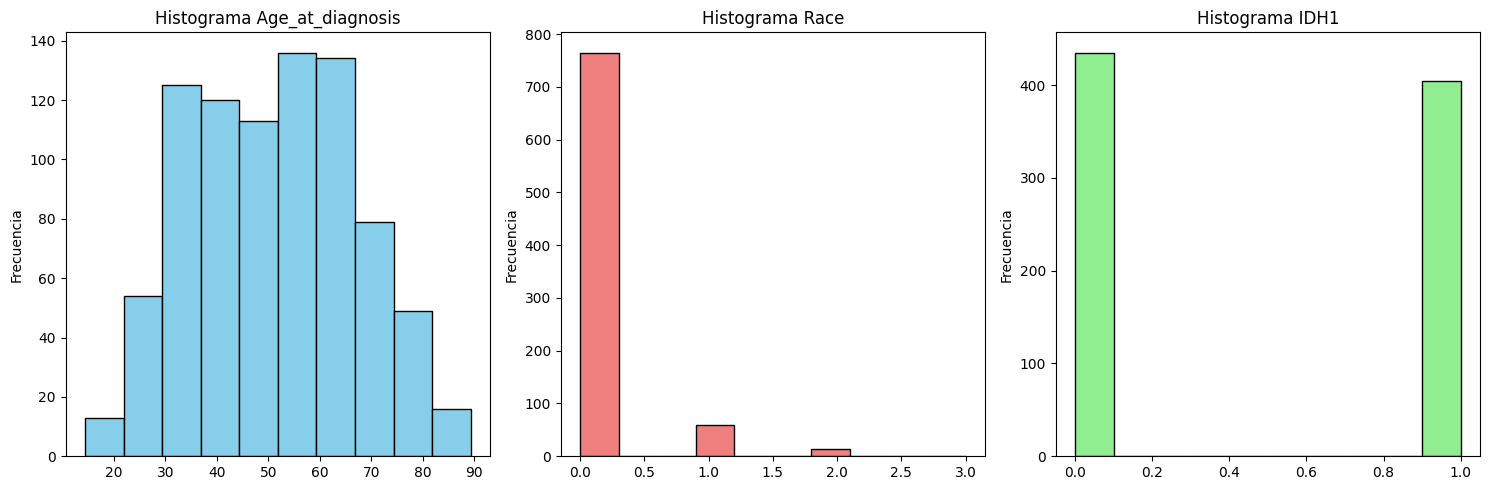

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df2['Age_at_diagnosis'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma Age_at_diagnosis')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(df2['Race'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Histograma Race')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(df2['IDH1'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Histograma IDH1')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Boxplots o violin plots por clase si es computacionalmente viable

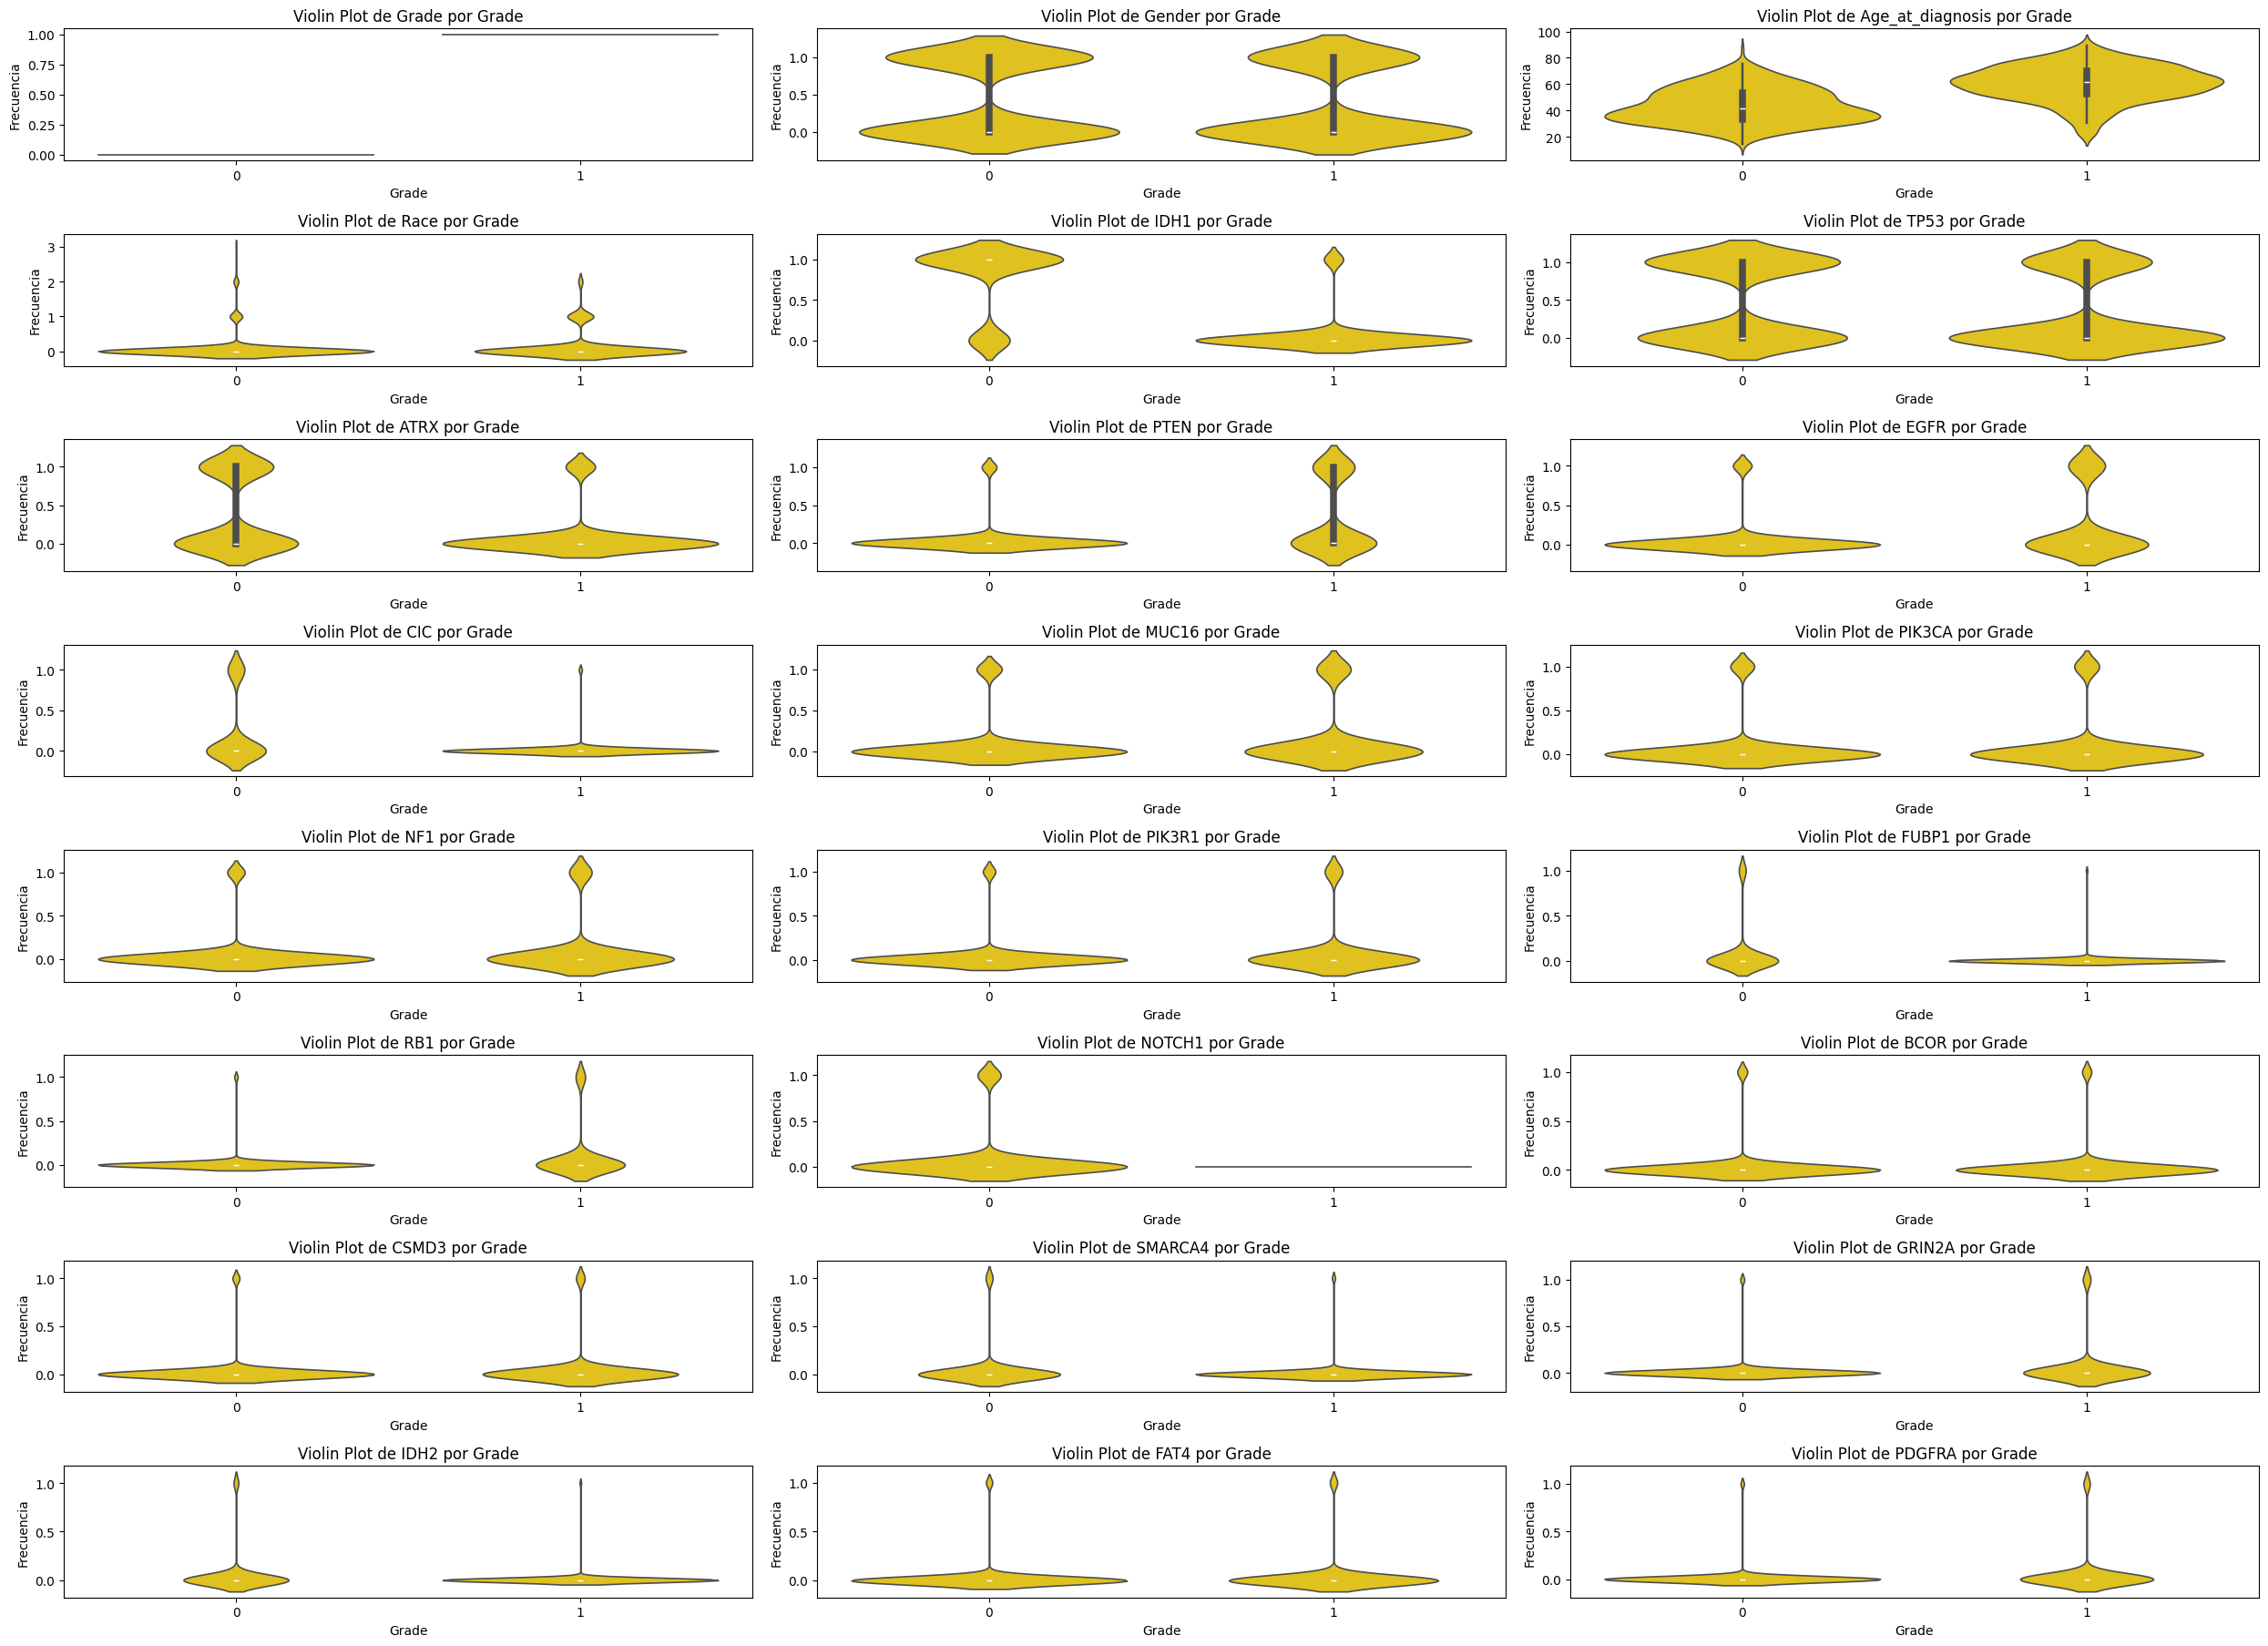

In [ ]:
numerical_cols = df2.select_dtypes(include=np.number).columns
plt.figure(figsize=(25, 20))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    sns.violinplot(x='Grade', y=col, data=df2, color='gold', linewidth=1.2)
    plt.xlabel('Grade')
    plt.ylabel('Frecuencia')
    plt.title(f'Violin Plot de {col} por Grade')

plt.tight_layout()
plt.show()

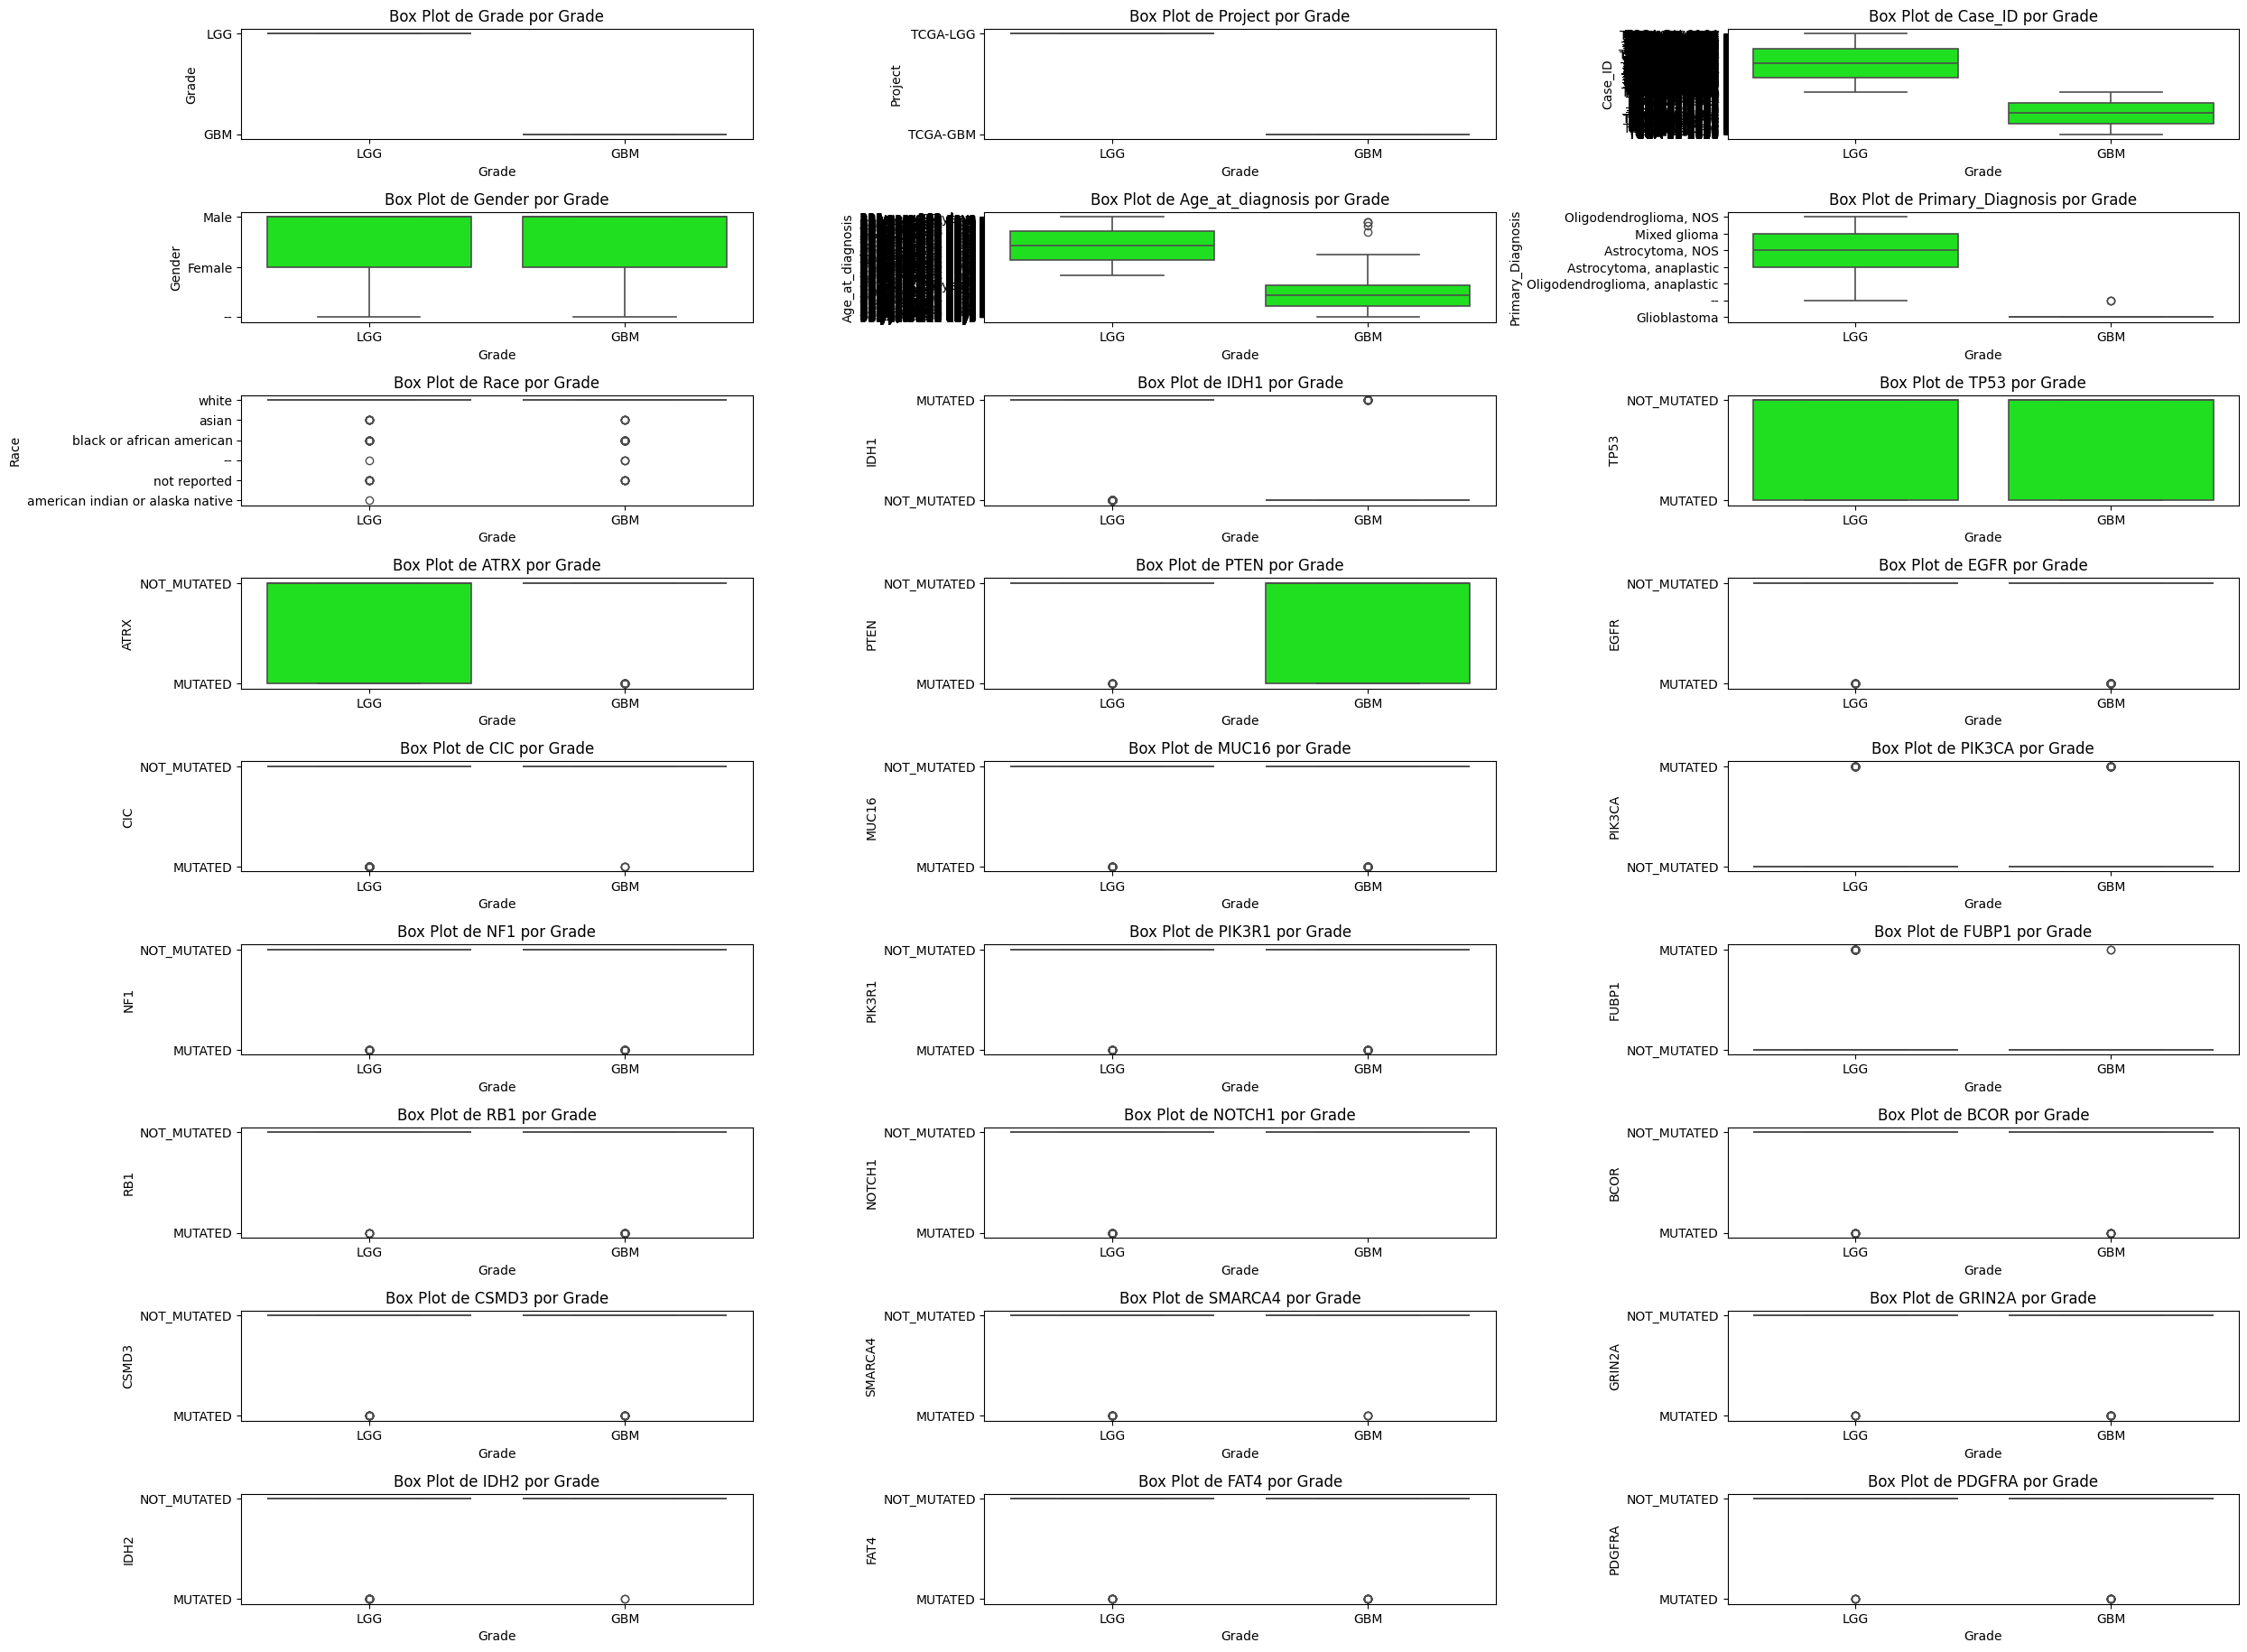

In [ ]:
numerical_cols1 = df1.select_dtypes(include=object).columns
plt.figure(figsize=(25, 20))
for i, col in enumerate(numerical_cols1):
    plt.subplot(len(numerical_cols1) // 3 + 1, 3, i + 1)
    sns.boxplot(x='Grade', y=col, data=df1, color='lime', linewidth=1.2)
    plt.xlabel('Grade')
    plt.title(f'Box Plot de {col} por Grade')
plt.tight_layout()
plt.show()

Mapa de calor de correlaciones entre variables

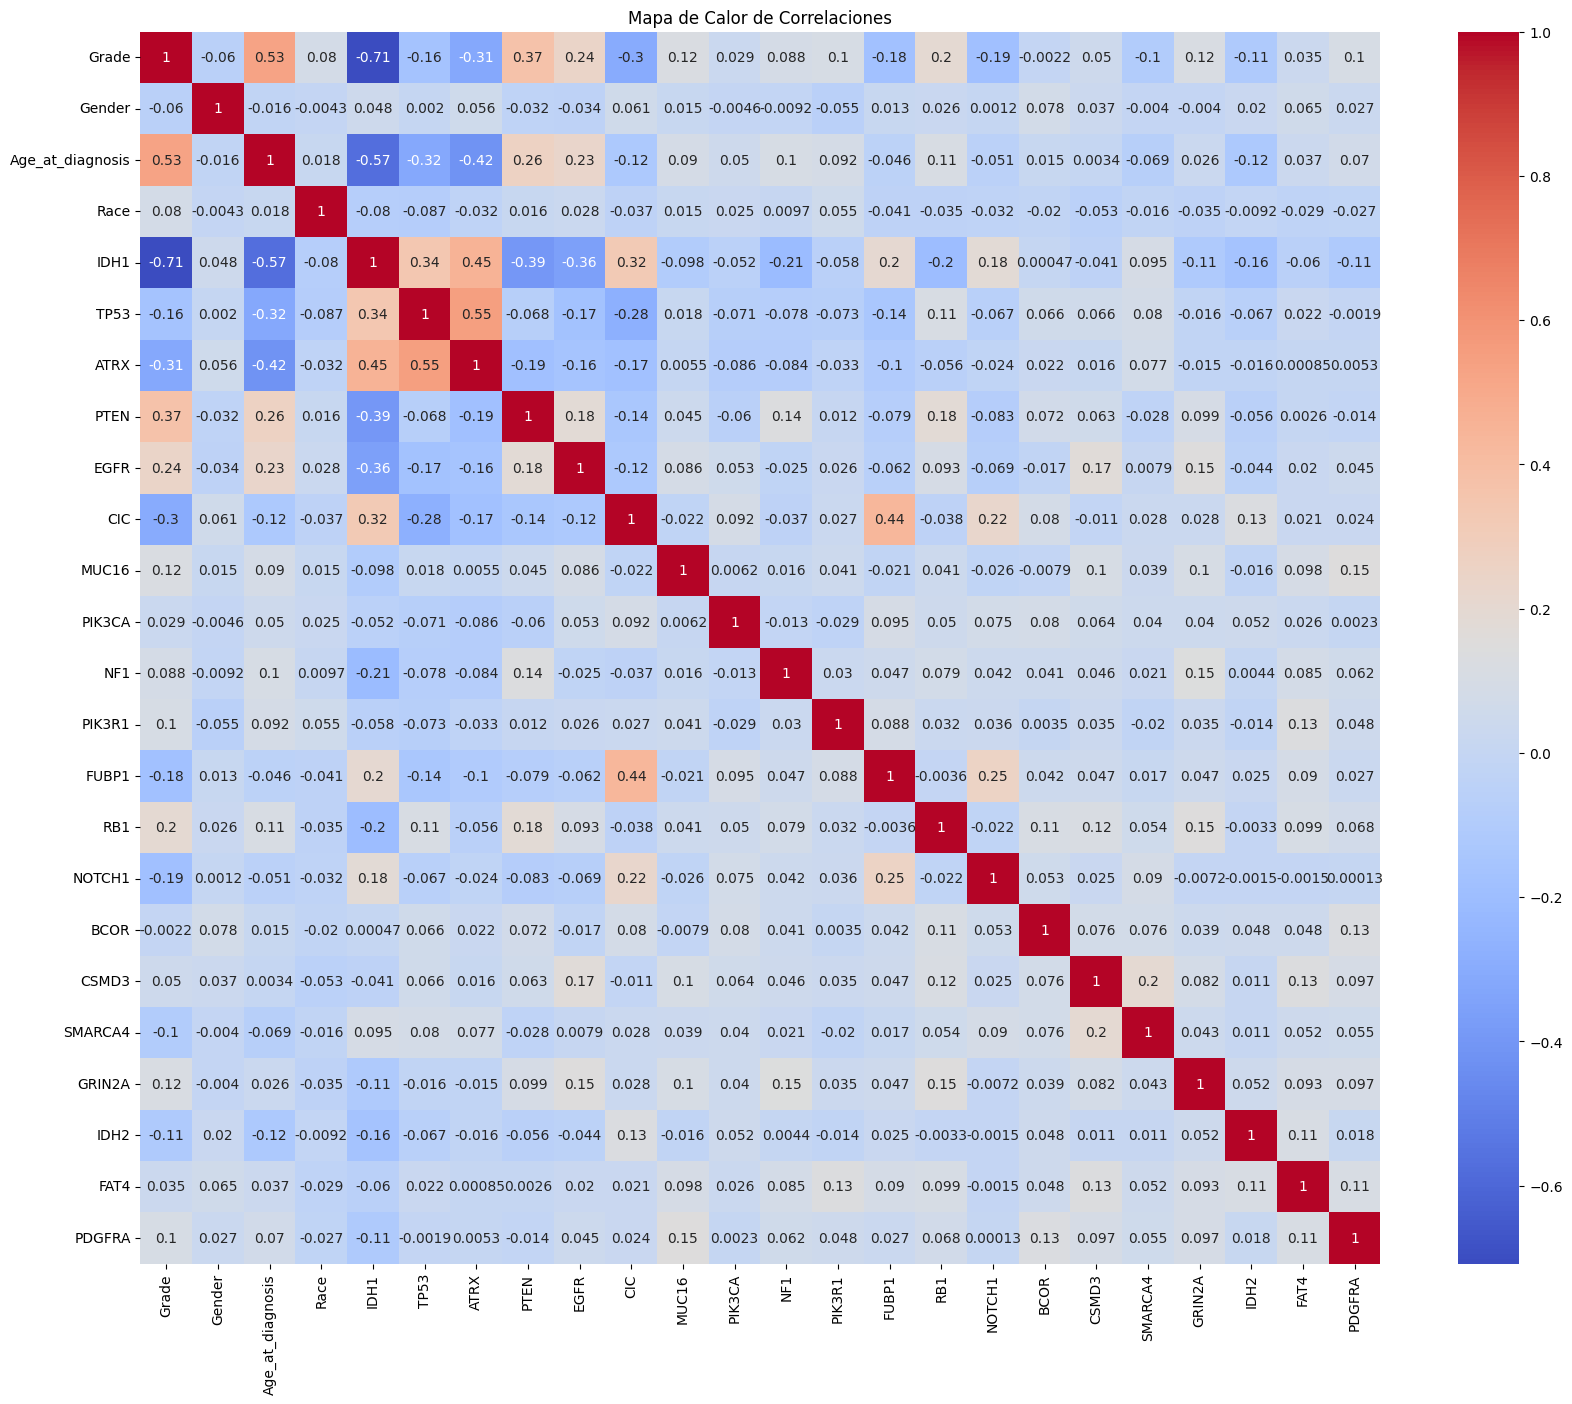

In [ ]:
corr = df2.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

***Reflexiona:***

*   ***¿Existen clases desbalanceadas?***

Sí.

*   ***¿Qué atributos parecen más informativos?***

El atributo Grade.


##**3. Gráfica de Errores en Entrenamiento y Prueba**

*   En este ejercicio vas a entrenar un árbol de decisión con diferentes profundidas. Asimismo, en gráfica mostrarás las exactitudes en entrenamiento y test, usando un stratified k-fold cross-validation con K= 10

*   Los valores de las profundides a evaluar son 2, 5, 10, 15, 20, 25, 30 y None

*   Deberás usar StratifiedKFold con 10 particiones, y un valor aleaotorio de 3

*   Entrenarás y evaluarás un árbol de decisión con estos distintos valores de profundidades

*   Usa cross_val_score para entrenar los modelos, usando como métrica de evaluación en scoring ="f1_macro",y el StratifiedKFold, con un valor aleatorio = 7

*   Muestra una fráfica para los distintos resultados  cuando se usa F1 Macro







In [ ]:
X = df2.drop('Grade', axis=1)
y = df2['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
f1_macro_scores = []
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

depths = [2, 5, 10, 15, 20, 25, 30, None]
scoring = ['f1_macro']
for d in depths:
    clf_cv = DecisionTreeClassifier(criterion='entropy',max_depth=d, random_state=7)

    results = cross_validate(clf_cv, X, y, cv=skf, scoring=scoring)
    f1_macro_scores.append(results['test_f1_macro'].mean())
    print(f"Profundidad: {d}")
    print("Resultados:")
    for metric in scoring:
      print(f"{metric}: {results['test_' + metric].mean():.4f}")

Profundidad: 2
Resultados:
f1_macro: 0.8677
Profundidad: 5
Resultados:
f1_macro: 0.8604
Profundidad: 10
Resultados:
f1_macro: 0.8427
Profundidad: 15
Resultados:
f1_macro: 0.8237
Profundidad: 20
Resultados:
f1_macro: 0.8115
Profundidad: 25
Resultados:
f1_macro: 0.8140
Profundidad: 30
Resultados:
f1_macro: 0.8127
Profundidad: None
Resultados:
f1_macro: 0.8127


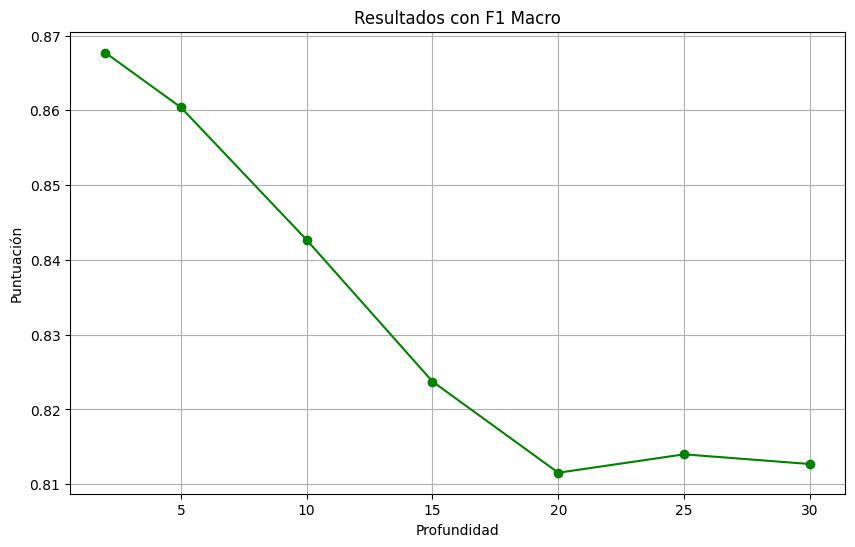

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(depths, f1_macro_scores, marker='o', color='green')
plt.xlabel("Profundidad")
plt.ylabel("Puntuación")
plt.title("Resultados con F1 Macro")
plt.grid(True)
plt.show()

##**4. Optimización de hiperparámetros con RandomizedSearchCV**

*   Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:

    *   Criterion = gini ,entropy
    *   max_depth: de 5 a 50 con incrementos de 1
    *   min_samples_split: de 2 a 20 con incrementos de 1
  
*   Usa el árbol de decisión

*   StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)

*   n_iter = 5 (combinaciones aleatorias a buscar)

*   n_jobs = -1 para acelerar cómputo

*   Métrica de evaluación: f1 Macro

*   Imprime los mejores hiperparámetros encontrados

*   Imprime el best_score










In [75]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(5, 51),
    'min_samples_split': range(2, 21)
}

random_search = RandomizedSearchCV(
    estimator=clf_cv,
    param_distributions=param_grid,
    n_iter=5,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:", random_search.best_params_)
print("Mejor exactitud promedio (Stratified):", random_search.best_score_)

Mejores hiperparámetros encontrados: {'min_samples_split': 11, 'max_depth': 18, 'criterion': 'entropy'}
Mejor exactitud promedio (Stratified): 0.815555959010578


##**5. Optimización de hiperparámetros con GridSearchCV**

*   Define el espacio de búsqueda para los siguientes hiperpárametros:

    *   Criterion = gini, entropy
    *   max_depth: de 5 a 50 con incrementos de 1
    *   min_samples_split: de 2 a 20 con incrementos de 1

*   Usa el árbol de decisión
*   StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
*   Métrica de evaluación: f1 Macro
*   n_jobs = -1 para acelerar cómputo
*   Imprime los mejores hiperparámetros encontrados
*   Imprime el best_score











In [73]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(5, 51),
    'min_samples_split': range(2, 21)
}

grid_search = GridSearchCV(estimator=clf_cv, param_grid=param_grid, scoring='f1_macro', n_jobs=-1)

grid_search.fit(X, y)

print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor exactitud promedio (Stratified):", grid_search.best_score_)

Mejores hiperparámetros encontrados: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 12}
Mejor exactitud promedio (Stratified): 0.8664441156857293


##**6. Optimización de hiperparámetros con RandomizedSearchCV: Accuracy**

*   Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:

    *   Criterion = gini ,entropy
    *   max_depth: de 5 a 50 con incrementos de 1
    *   min_samples_split: de 2 a 20 con incrementos de 1

*   Usa el árbol de decisión
*   StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
*   n_iter = 5 (combinaciones aleatorias a buscar)
*   n_jobs = -1 para acelerar cómputo
*   Métrica de evaluación: accuracy
*   Imprime los mejores hiperparámetros encontrados
*   Imprime el best_score













In [76]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(5, 51),
    'min_samples_split': range(2, 21)
}

random_search = RandomizedSearchCV(
    estimator=clf_cv,
    param_distributions=param_grid,
    n_iter=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:", random_search.best_params_)
print("Mejor exactitud promedio (Stratified):", random_search.best_score_)

Mejores hiperparámetros encontrados: {'min_samples_split': 11, 'max_depth': 18, 'criterion': 'entropy'}
Mejor exactitud promedio (Stratified): 0.8193973634651602


##**7. Optimización de hiperparámetros con GridSearchCV: accuracy**

*   Define el espacio de búsqueda  para los siguientes hiperpárametros:

    *   Criterion = gini ,entropy
    *   max_depth: de 5 a 50 con incrementos de 1
    *   min_samples_split: de 2 a 20 con incrementos de 1

*   Usa el árbol de decisión
*   StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
*   Métrica de evaluación: f1 Macro
*   n_jobs = -1 para acelerar cómputo
*   Imprime los mejores hiperparámetros encontrados
*   Imprime el best_score











In [74]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(5, 51),
    'min_samples_split': range(2, 21)
}

grid_search = GridSearchCV(estimator=clf_cv, param_grid=param_grid, scoring='accuracy', n_jobs=-1)

grid_search.fit(X, y)

print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor exactitud promedio (Stratified):", grid_search.best_score_)

Mejores hiperparámetros encontrados: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 12}
Mejor exactitud promedio (Stratified): 0.8677288280581694


##**8. Actividad de reflexión y análisis**

*   ***¿Cuál método encontró mejores hiperparámetros?***

RandomizedSearchCV.

*   ***¿Cuál fue más costoso computacionalmente?***

GridSearchCV.

*   ***¿Los resultados en f1_macro set fueron distintos en ambos métodos de optimización? ¿Por qué?***

Los resultados fueron diferentes debido a que RandomizedSearchCV y GridSearchCV exploran el espacio de hiperparámetros de manera diferente. RandomizedSearchCV muestrea aleatoriamente combinaciones de hiperparámetros del espacio de búsqueda definido y GridSearchCV realizada una búsqueda más exhaustiva probando distintas combinaciones de hiperparámetros.

*   ***¿Los resultados en accuracy set fueron distintos en ambos métodos de optimización? ¿Por qué?***

Los resultados fueron diferentes porque a pesar de utilizar la misma métrica exploran de forma distinta el espacio de hiperparámetros.

*   ***¿Los valores de hiperpárametros fueron iguales en Accuracy y F1 Macro?***

No.



